In [2]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 51.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: torch
    Found existing installation: torch 2.9.0
    Uninstalling torch-2.9.0:
      Successfully uninstalled torch-2.9.0


In [8]:

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [9]:

transform = transforms.ToTensor()
train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)


In [10]:

class AutoEncoder(nn.Module):
    def __init__(self, latent_dim=2):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat, z


In [12]:

model = AutoEncoder(latent_dim=2)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

for epoch in range(20):
    for x, _ in train_loader:
        x = x.view(-1, 784)
        x_hat, _ = model(x)
        loss = criterion(x_hat, x) # compute the loss
        optimizer.zero_grad() # Zero all gradients
        loss.backward() # back propagation
        optimizer.step() # Update all params
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 0.0544
Epoch 2, Loss: 0.0508
Epoch 3, Loss: 0.0499
Epoch 4, Loss: 0.0461
Epoch 5, Loss: 0.0491
Epoch 6, Loss: 0.0460
Epoch 7, Loss: 0.0459
Epoch 8, Loss: 0.0452
Epoch 9, Loss: 0.0436
Epoch 10, Loss: 0.0452
Epoch 11, Loss: 0.0434
Epoch 12, Loss: 0.0460
Epoch 13, Loss: 0.0450
Epoch 14, Loss: 0.0406
Epoch 15, Loss: 0.0453
Epoch 16, Loss: 0.0442
Epoch 17, Loss: 0.0433
Epoch 18, Loss: 0.0414
Epoch 19, Loss: 0.0421
Epoch 20, Loss: 0.0402


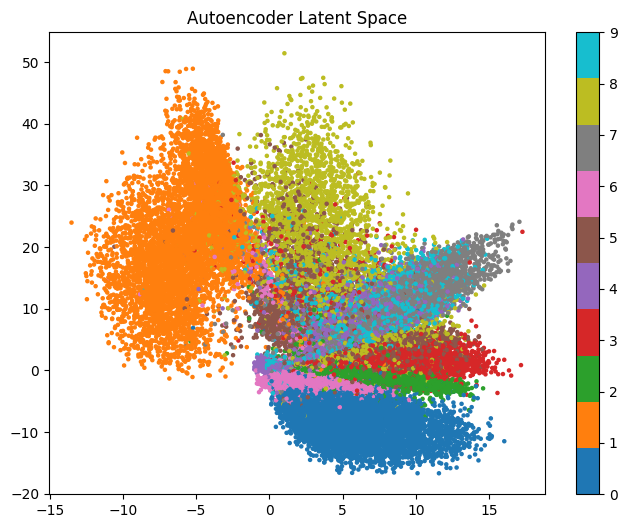

In [13]:

model.eval()
latents, labels = [], []

with torch.no_grad():
    for x, y in train_loader:
        x = x.view(-1, 784)
        _, z = model(x)
        latents.append(z)
        labels.append(y)

latents = torch.cat(latents).numpy()
labels = torch.cat(labels).numpy()

plt.figure(figsize=(8,6))
plt.scatter(latents[:,0], latents[:,1], c=labels, cmap="tab10", s=5)
plt.colorbar()
plt.title("Autoencoder Latent Space")
plt.show()
